LIBRARIES
******

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style("whitegrid")
from functs import functs
import datetime as dt
import matplotlib as mpl

DATA PREPROCESSING
******

In [3]:
data = pd.read_csv("../../bullshit_data/MCSFT_EBITDA.txt")
print("--------------------------------------------------------------")
print("DATA INFO")
print("--------------------------------------------------------------")
data.info()
print()
print()
print()
print("--------------------------------------------------------------")
print("DATA DESCRIPTION")
print("--------------------------------------------------------------")
print(data.describe().T)
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

data

--------------------------------------------------------------
DATA INFO
--------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    54 non-null     object
 1   EBITDA  54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes



--------------------------------------------------------------
DATA DESCRIPTION
--------------------------------------------------------------
        count          mean          std     min     25%     50%      75%  \
EBITDA   54.0  11273.888889  5620.930419  4668.0  7258.5  8978.0  13263.5   

            max  
EBITDA  25743.0  


,EBITDA
Date,
2022-06-30,24513
2022-03-31,24137
2021-12-31,25743
2021-09-30,23450
2021-06-30,22439
2021-03-31,19984
2020-12-31,20658
2020-09-30,18521
2020-06-30,16911


TIME SERIES ANALYSIS
------
******

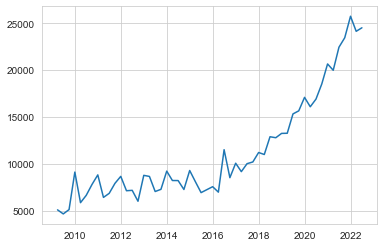

In [4]:
plt.plot(data['EBITDA'])
plt.show()

In [5]:
data = data.loc['2015-01-01':]
data

C:\Users\kmate\AppData\Local\Temp\ipykernel_24796\765082189.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data.loc['2015-01-01':]


,EBITDA
Date,
2022-06-30,24513
2022-03-31,24137
2021-12-31,25743
2021-09-30,23450
2021-06-30,22439
2021-03-31,19984
2020-12-31,20658
2020-09-30,18521
2020-06-30,16911


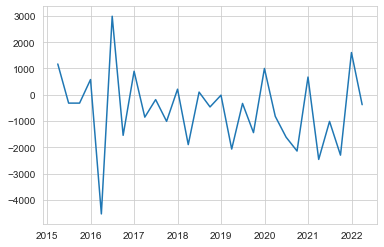

In [7]:
data_ = data.diff(1)
data_ = data_.dropna()

plt.plot(data_)
plt.show()

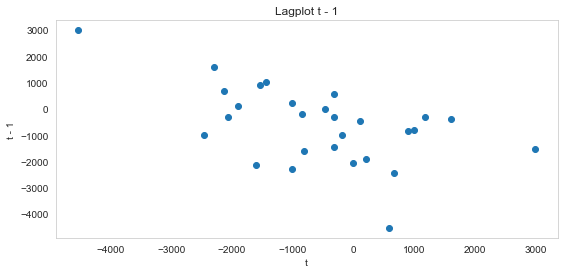

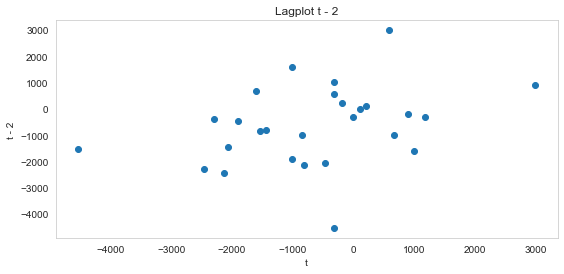

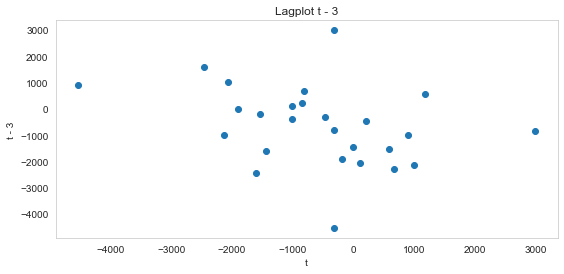

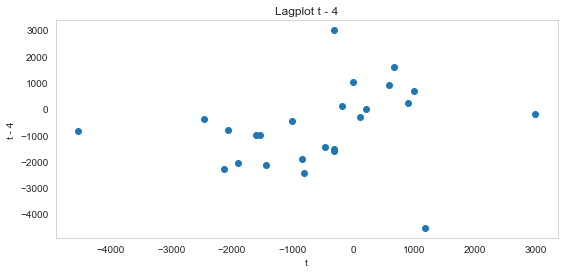

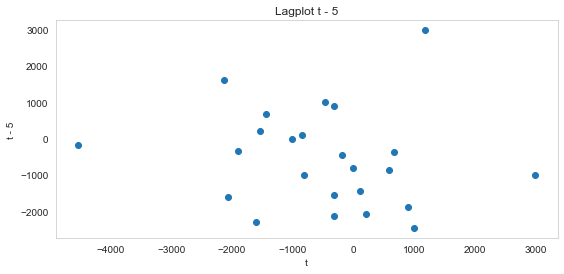

In [8]:
functs.lag_plot(data_, 5)

CHECKING FOR SEASONALITY
******

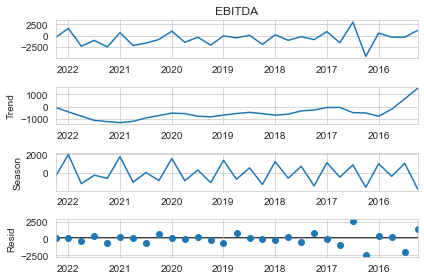

In [9]:
from statsmodels.tsa.seasonal import STL

stl = STL(data_['EBITDA'], seasonal=13)
res = stl.fit()
fig = res.plot()

In [28]:
years = []
for i in data_.index:
    years.append(i.year)
years = list(set(years))
years.remove(years[-1])
print(years)

seasons = []

for i in range(0, len(years)):
    i =

[2016, 2017, 2018, 2019, 2020, 2021, 2022]


C:\Users\kmate\AppData\Local\Temp\ipykernel_24796\1845366861.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_1 = data_.loc['2016-01-01':'2017-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_24796\1845366861.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_2 = data_.loc['2017-01-01':'2018-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_24796\1845366861.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_3 = data_.loc['2018-01-01':'2019-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_24796\1845366861.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and 

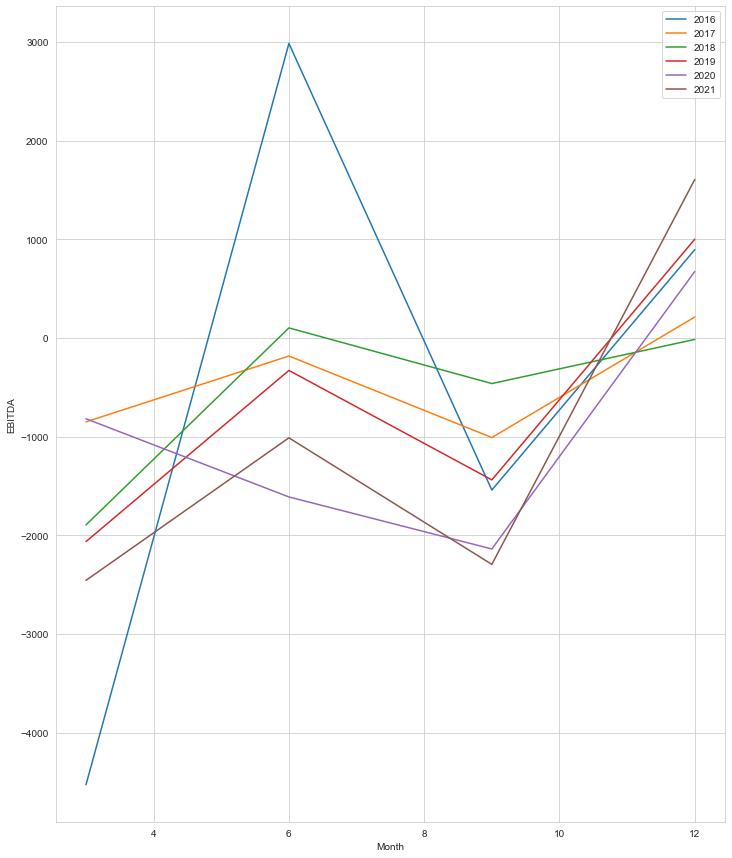

In [10]:
years = ['2016', '2017', '2018', '2019', '2020', '2021']

seasons = []
s_1 = data_.loc['2016-01-01':'2017-01-01']
s_2 = data_.loc['2017-01-01':'2018-01-01']
s_3 = data_.loc['2018-01-01':'2019-01-01']
s_4 = data_.loc['2019-01-01':'2020-01-01']
s_5 = data_.loc['2020-01-01':'2021-01-01']
s_6 = data_.loc['2021-01-01':'2021-12-31']
s_7 = data_.loc['2022-01-01':]

seasons.append(s_1)
seasons.append(s_2)
seasons.append(s_3)
seasons.append(s_4)
seasons.append(s_5)
seasons.append(s_6)
seasons.append(s_7)

figure = plt.figure(figsize=(12, 15))
for season in seasons:
    plt.plot(season.index.month, season.EBITDA)
    plt.xlabel('Month')
    plt.ylabel('EBITDA')
plt.legend([year for year in years])
plt.show()

CHECKING FOR STATIONARITY
*******

In [11]:
print("KPSS")
print("--------------------------------------------")
print(functs.kpss_test(data_))
print('--------------------------------------------')
print("ADF")
print("--------------------------------------------")
print(functs.adf_test(data_))

KPSS
--------------------------------------------
Results of KPSS test:
Test Statistic    0.226756
p-value           0.100000
dtype: float64
None
--------------------------------------------
ADF
--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -9.270235e+00
p-value                        1.332914e-15
#Lags Used                     0.000000e+00
Number of Observations Used    2.800000e+01
Critical Value (1%)           -3.688926e+00
Critical Value (5%)           -2.971989e+00
Critical Value (10%)          -2.625296e+00
dtype: float64
None


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


EXPLORATORY DATA ANALYSIS
******

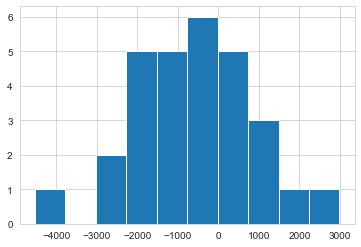

In [12]:
_ = data_['EBITDA'].hist()

C:\Users\kmate\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


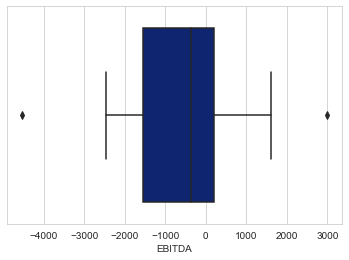

In [13]:
_ = sns.boxplot(data_['EBITDA'], palette='dark')

CHECKING FOR AUTOCORRELATION
*****

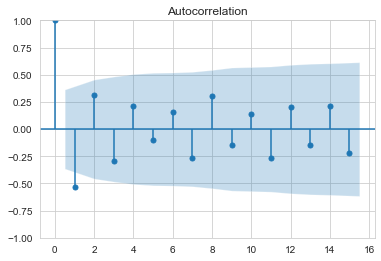

C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


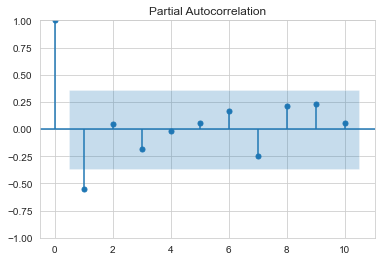

In [14]:
sm.graphics.tsa.plot_acf(data_)
plt.show()
sm.graphics.tsa.plot_pacf(data_, lags=10)
plt.show()

In [15]:
sm.stats.diagnostic.acorr_ljungbox(data_)

,lb_stat,lb_pvalue
1,9.112530,0.002539
2,12.339874,0.002091
3,15.328593,0.001556
4,16.897244,0.002024
5,17.298155,0.003968


MODEL ( SARIMAX )
-----
*****


In [30]:
import pmdarima

In [31]:
auto = pmdarima.auto_arima(data_, information_criterion="aic")
print(auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -247.422
Date:                Sat, 08 Oct 2022   AIC                            500.844
Time:                        16:39:54   BIC                            504.945
Sample:                             0   HQIC                           502.128
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -924.8235    264.731     -3.493      0.000   -1443.686    -405.960
ar.L1         -0.5455      0.166     -3.296      0.001      -0.870      -0.221
sigma2      1.539e+06   4.55e+05      3.381      0.0

<Figure size 432x288 with 0 Axes>

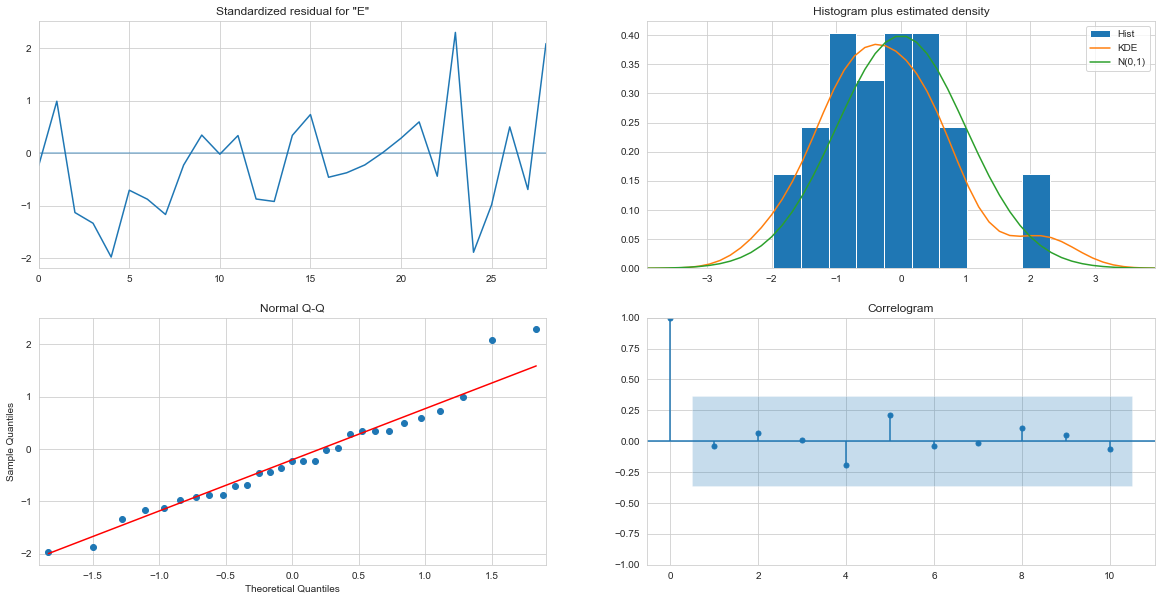

In [32]:
plt.figure()
res.plot_diagnostics(figsize=(20,10))
plt.show()

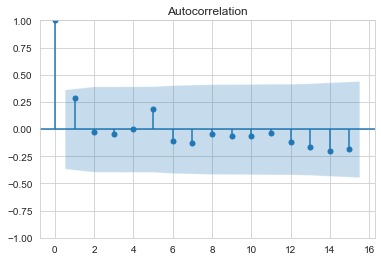

C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


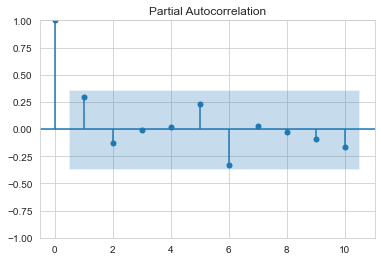

In [33]:
resid = pow(res.resid, 2)
sm.graphics.tsa.plot_acf(resid)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=10)
plt.show()

PREDICTIONS
****

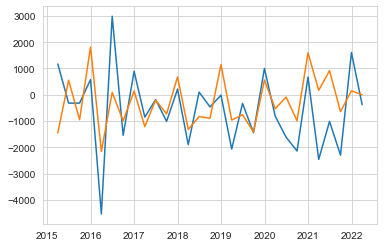

In [34]:
prediction_IS = pd.DataFrame(res.predict(X = data_))
prediction_IS.columns = ['EBITDA']
plt.plot(data_)
plt.plot(prediction_IS)
plt.show()

MODEL ( MA )
----
*****